In [40]:
!uv add pandas
!uv add numpy
!uv add matplotlib
!uv add seaborn

Resolved 7 packages in 0.57ms
Audited 6 packages in 0.02ms
Resolved 7 packages in 0.62ms
Audited 6 packages in 0.02ms
Resolved 15 packages in 1.56s                                        
Prepared 2 packages in 963ms                                             
Installed 7 packages in 26ms                                
 + contourpy==1.3.3
 + cycler==0.12.1
 + fonttools==4.60.1
 + kiwisolver==1.4.9
 + matplotlib==3.10.6
 + pillow==11.3.0
 + pyparsing==3.2.5
Resolved 16 packages in 280ms                                        
Installed 1 package in 8ms                                       ░░░░░░░░░░░░░░░░░░░░ [0/0] Installing wheels...                                 
 + seaborn==0.13.2


In [2]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('../src/data/raw/participants/train_candles.csv')
targets = df[["target_return_1d", "target_direction_1d", "target_return_20d", "target_direction_20d"]]
df = df.drop(columns = ["target_return_1d", "target_direction_1d", "target_return_20d", "target_direction_20d"])
df.head()

,open,close,high,low,volume,begin,ticker
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT


In [77]:
df["ticker"].unique()


array(['AFLT', 'ALRS', 'CHMF', 'GAZP', 'GMKN', 'LKOH', 'MAGN', 'MGNT',
       'MOEX', 'MTSS', 'NVTK', 'PHOR', 'PLZL', 'ROSN', 'RUAL', 'SBER',
       'SIBN', 'T', 'VTBR'], dtype=object)

In [78]:
df.isna().sum()

open      0
close     0
high      0
low       0
volume    0
begin     0
ticker    0
dtype: int64

In [79]:
df["price_change"] = [abs(df["open"][i]- df["close"][i]) for i in range(len(df))]
df

,open,close,high,low,volume,begin,ticker,price_change
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT,0.20
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT,0.38
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT,0.84
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT,0.80
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT,1.12
...,...,...,...,...,...,...,...,...
23113,73.25,76.76,76.84,72.96,86278762,2025-04-11,VTBR,3.51
23114,77.00,78.17,78.28,76.91,13869580,2025-04-12,VTBR,1.17
23115,78.10,78.19,78.24,77.70,7366879,2025-04-13,VTBR,0.09
23116,78.20,75.50,78.29,75.09,62802061,2025-04-14,VTBR,2.70


In [80]:
df["absolute_change"] = [abs(df["low"][i]- df["high"][i]) for i in range(len(df))]
df

,open,close,high,low,volume,begin,ticker,price_change,absolute_change
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT,0.20,2.04
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT,0.38,3.72
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT,0.84,2.08
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT,0.80,2.58
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT,1.12,2.68
...,...,...,...,...,...,...,...,...,...
23113,73.25,76.76,76.84,72.96,86278762,2025-04-11,VTBR,3.51,3.88
23114,77.00,78.17,78.28,76.91,13869580,2025-04-12,VTBR,1.17,1.37
23115,78.10,78.19,78.24,77.70,7366879,2025-04-13,VTBR,0.09,0.54
23116,78.20,75.50,78.29,75.09,62802061,2025-04-14,VTBR,2.70,3.20


In [81]:
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['vol_5d'] = df['log_return'].rolling(window=5).std()
df['vol_20d'] = df['log_return'].rolling(window=20).std()
df.head()

,open,close,high,low,volume,begin,ticker,price_change,absolute_change,log_return,vol_5d,vol_20d
0,81.50,81.70,83.20,81.16,29755530,2020-06-19,AFLT,0.20,2.04,NaN,NaN,NaN
1,81.72,82.10,83.98,80.26,18502950,2020-06-22,AFLT,0.38,3.72,0.004884,NaN,NaN
2,82.04,81.20,82.48,80.40,16848930,2020-06-23,AFLT,0.84,2.08,-0.011023,NaN,NaN
3,79.78,80.58,80.80,78.22,21559860,2020-06-25,AFLT,0.80,2.58,-0.007665,NaN,NaN
4,80.50,79.38,81.44,78.76,14677280,2020-06-26,AFLT,1.12,2.68,-0.015004,NaN,NaN


In [82]:
df.isna().sum()

open                0
close               0
high                0
low                 0
volume              0
begin               0
ticker              0
price_change        0
absolute_change     0
log_return          1
vol_5d              5
vol_20d            20
dtype: int64

In [83]:
corr_matrix = df[22:].drop(columns = ["ticker", "begin"]).corr()
corr_matrix

,open,close,high,low,volume,price_change,absolute_change,log_return,vol_5d,vol_20d
open,1.000000,0.999696,0.999812,0.999719,-0.088032,0.582594,0.689480,0.012480,-0.002752,-0.002902
close,0.999696,1.000000,0.999820,0.999793,-0.088050,0.581999,0.687876,0.016669,-0.002549,-0.002777
high,0.999812,0.999820,1.000000,0.999570,-0.088019,0.590909,0.697851,0.014524,-0.001583,-0.002243
low,0.999719,0.999793,0.999570,1.000000,-0.088056,0.571972,0.676544,0.015330,-0.003690,-0.003450
volume,-0.088032,-0.088050,-0.088019,-0.088056,1.000000,-0.049323,-0.059600,-0.004391,0.015329,0.007419
price_change,0.582594,0.581999,0.590909,0.571972,-0.049323,1.000000,0.868616,0.001359,0.049454,0.025075
absolute_change,0.689480,0.687876,0.697851,0.676544,-0.059600,0.868616,1.000000,-0.009688,0.050354,0.027936
log_return,0.012480,0.016669,0.014524,0.015330,-0.004391,0.001359,-0.009688,1.000000,-0.038536,-0.018047
vol_5d,-0.002752,-0.002549,-0.001583,-0.003690,0.015329,0.049454,0.050354,-0.038536,1.000000,0.500979
vol_20d,-0.002902,-0.002777,-0.002243,-0.003450,0.007419,0.025075,0.027936,-0.018047,0.500979,1.000000


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

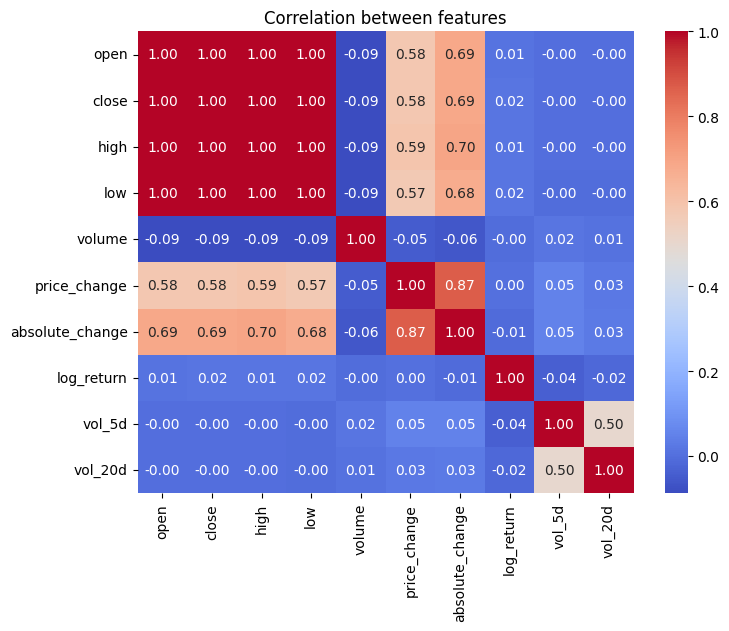

In [85]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between features")
plt.show()

In [97]:
#one-hot coder
df = df.join(pd.get_dummies(df["ticker"], dtype="int64"))

In [98]:
df.head()


,open,close,high,low,volume,ticker,price_change,absolute_change,log_return,vol_5d,...,MTSS,NVTK,PHOR,PLZL,ROSN,RUAL,SBER,SIBN,T,VTBR
0,81.50,81.70,83.20,81.16,29755530,AFLT,0.20,2.04,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,81.72,82.10,83.98,80.26,18502950,AFLT,0.38,3.72,0.004884,NaN,...,0,0,0,0,0,0,0,0,0,0
2,82.04,81.20,82.48,80.40,16848930,AFLT,0.84,2.08,-0.011023,NaN,...,0,0,0,0,0,0,0,0,0,0
3,79.78,80.58,80.80,78.22,21559860,AFLT,0.80,2.58,-0.007665,NaN,...,0,0,0,0,0,0,0,0,0,0
4,80.50,79.38,81.44,78.76,14677280,AFLT,1.12,2.68,-0.015004,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df["begin"] = pd.to_datetime(df["begin"])
df["date_ts"] = df["begin"].astype("int64") // 10**9   # секунды
df.drop(columns=["begin"], inplace=True)
df["date_ts"]


In [100]:
df.head()

,open,close,high,low,volume,ticker,price_change,absolute_change,log_return,vol_5d,...,MTSS,NVTK,PHOR,PLZL,ROSN,RUAL,SBER,SIBN,T,VTBR
0,81.50,81.70,83.20,81.16,29755530,AFLT,0.20,2.04,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,81.72,82.10,83.98,80.26,18502950,AFLT,0.38,3.72,0.004884,NaN,...,0,0,0,0,0,0,0,0,0,0
2,82.04,81.20,82.48,80.40,16848930,AFLT,0.84,2.08,-0.011023,NaN,...,0,0,0,0,0,0,0,0,0,0
3,79.78,80.58,80.80,78.22,21559860,AFLT,0.80,2.58,-0.007665,NaN,...,0,0,0,0,0,0,0,0,0,0
4,80.50,79.38,81.44,78.76,14677280,AFLT,1.12,2.68,-0.015004,NaN,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df.columns


Index(['open', 'close', 'high', 'low', 'volume', 'ticker', 'price_change',
       'absolute_change', 'log_return', 'vol_5d', 'vol_20d', 'date_ts', 'AFLT',
       'ALRS', 'CHMF', 'GAZP', 'GMKN', 'LKOH', 'MAGN', 'MGNT', 'MOEX', 'MTSS',
       'NVTK', 'PHOR', 'PLZL', 'ROSN', 'RUAL', 'SBER', 'SIBN', 'T', 'VTBR'],
      dtype='object')

In [103]:

df["log_return"] = np.log(df["close"] / df["close"].shift(1))

# --- 2. Волатильность ---
df["vol_5d"] = df["log_return"].rolling(5).std()
df["vol_20d"] = df["log_return"].rolling(20).std()
df["vol_ratio"] = df["vol_5d"] / df["vol_20d"]

    # --- 3. Свечной анализ ---
df["oc_range"] = (df["close"] - df["open"]) / df["open"]
df["hl_range"] = (df["high"] - df["low"]) / df["close"]

    # --- 4. Объём ---
df["volume_rel"] = df["volume"] / df["volume"].rolling(20).mean()

    # --- 5. Скользящие средние ---
df["sma_5"] = df["close"].rolling(5).mean()
df["sma_20"] = df["close"].rolling(20).mean()
df["sma_ratio"] = df["sma_5"] / df["sma_20"]

    # --- 6. Временные признаки ---
dt = pd.to_datetime(df["date_ts"], unit="s")
df["dayofweek"] = dt.dt.dayofweek
df["dow_sin"] = np.sin(2 * np.pi * df["dayofweek"] / 7)
df["dow_cos"] = np.cos(2 * np.pi * df["dayofweek"] / 7)

df.head()

,open,close,high,low,volume,ticker,price_change,absolute_change,log_return,vol_5d,...,vol_ratio,oc_range,hl_range,volume_rel,sma_5,sma_20,sma_ratio,dayofweek,dow_sin,dow_cos
0,81.50,81.70,83.20,81.16,29755530,AFLT,0.20,2.04,NaN,NaN,...,NaN,0.002454,0.024969,NaN,NaN,NaN,NaN,4,-0.433884,-0.900969
1,81.72,82.10,83.98,80.26,18502950,AFLT,0.38,3.72,0.004884,NaN,...,NaN,0.004650,0.045311,NaN,NaN,NaN,NaN,0,0.000000,1.000000
2,82.04,81.20,82.48,80.40,16848930,AFLT,0.84,2.08,-0.011023,NaN,...,NaN,-0.010239,0.025616,NaN,NaN,NaN,NaN,1,0.781831,0.623490
3,79.78,80.58,80.80,78.22,21559860,AFLT,0.80,2.58,-0.007665,NaN,...,NaN,0.010028,0.032018,NaN,NaN,NaN,NaN,3,0.433884,-0.900969
4,80.50,79.38,81.44,78.76,14677280,AFLT,1.12,2.68,-0.015004,NaN,...,NaN,-0.013913,0.033762,NaN,80.992,NaN,NaN,4,-0.433884,-0.900969


In [104]:
df.columns

Index(['open', 'close', 'high', 'low', 'volume', 'ticker', 'price_change',
       'absolute_change', 'log_return', 'vol_5d', 'vol_20d', 'date_ts', 'AFLT',
       'ALRS', 'CHMF', 'GAZP', 'GMKN', 'LKOH', 'MAGN', 'MGNT', 'MOEX', 'MTSS',
       'NVTK', 'PHOR', 'PLZL', 'ROSN', 'RUAL', 'SBER', 'SIBN', 'T', 'VTBR',
       'vol_ratio', 'oc_range', 'hl_range', 'volume_rel', 'sma_5', 'sma_20',
       'sma_ratio', 'dayofweek', 'dow_sin', 'dow_cos'],
      dtype='object')

In [106]:
data_out = df.drop(columns = ["open", "close", "high", "low", "volume", "ticker", "absolute_change"])
data_out.head()

,price_change,log_return,vol_5d,vol_20d,date_ts,AFLT,ALRS,CHMF,GAZP,GMKN,...,vol_ratio,oc_range,hl_range,volume_rel,sma_5,sma_20,sma_ratio,dayofweek,dow_sin,dow_cos
0,0.20,NaN,NaN,NaN,1592524800,1,0,0,0,0,...,NaN,0.002454,0.024969,NaN,NaN,NaN,NaN,4,-0.433884,-0.900969
1,0.38,0.004884,NaN,NaN,1592784000,1,0,0,0,0,...,NaN,0.004650,0.045311,NaN,NaN,NaN,NaN,0,0.000000,1.000000
2,0.84,-0.011023,NaN,NaN,1592870400,1,0,0,0,0,...,NaN,-0.010239,0.025616,NaN,NaN,NaN,NaN,1,0.781831,0.623490
3,0.80,-0.007665,NaN,NaN,1593043200,1,0,0,0,0,...,NaN,0.010028,0.032018,NaN,NaN,NaN,NaN,3,0.433884,-0.900969
4,1.12,-0.015004,NaN,NaN,1593129600,1,0,0,0,0,...,NaN,-0.013913,0.033762,NaN,80.992,NaN,NaN,4,-0.433884,-0.900969


In [109]:
data_out.isna().sum()

price_change     0
log_return       1
vol_5d           5
vol_20d         20
date_ts          0
AFLT             0
ALRS             0
CHMF             0
GAZP             0
GMKN             0
LKOH             0
MAGN             0
MGNT             0
MOEX             0
MTSS             0
NVTK             0
PHOR             0
PLZL             0
ROSN             0
RUAL             0
SBER             0
SIBN             0
T                0
VTBR             0
vol_ratio       20
oc_range         0
hl_range         0
volume_rel      19
sma_5            4
sma_20          19
sma_ratio       19
dayofweek        0
dow_sin          0
dow_cos          0
dtype: int64

In [111]:
data_out = data_out.dropna().reset_index(drop = True)
data_out.head()

,price_change,log_return,vol_5d,vol_20d,date_ts,AFLT,ALRS,CHMF,GAZP,GMKN,...,vol_ratio,oc_range,hl_range,volume_rel,sma_5,sma_20,sma_ratio,dayofweek,dow_sin,dow_cos
0,2.36,0.036283,0.017475,0.016081,1595289600,1,0,0,0,0,...,1.086735,0.027700,0.034947,1.638854,84.160,81.963,1.026805,1,0.781831,0.623490
1,1.92,-0.017047,0.021648,0.016714,1595376000,1,0,0,0,0,...,1.295198,-0.021818,0.041589,1.198809,84.716,82.162,1.031085,2,0.974928,-0.222521
2,0.98,-0.010980,0.021416,0.016712,1595462400,1,0,0,0,0,...,1.281459,-0.011379,0.026075,0.619763,85.284,82.359,1.035515,3,0.433884,-0.900969
3,2.92,0.037122,0.025497,0.018229,1595548800,1,0,0,0,0,...,1.398731,0.034176,0.057945,1.997852,86.316,82.748,1.043119,4,-0.433884,-0.900969
4,1.00,-0.008182,0.026907,0.017903,1595808000,1,0,0,0,0,...,1.502894,-0.011282,0.034916,0.973641,86.956,83.161,1.045634,0,0.000000,1.000000


In [112]:
data_out.isna().sum()

price_change    0
log_return      0
vol_5d          0
vol_20d         0
date_ts         0
AFLT            0
ALRS            0
CHMF            0
GAZP            0
GMKN            0
LKOH            0
MAGN            0
MGNT            0
MOEX            0
MTSS            0
NVTK            0
PHOR            0
PLZL            0
ROSN            0
RUAL            0
SBER            0
SIBN            0
T               0
VTBR            0
vol_ratio       0
oc_range        0
hl_range        0
volume_rel      0
sma_5           0
sma_20          0
sma_ratio       0
dayofweek       0
dow_sin         0
dow_cos         0
dtype: int64

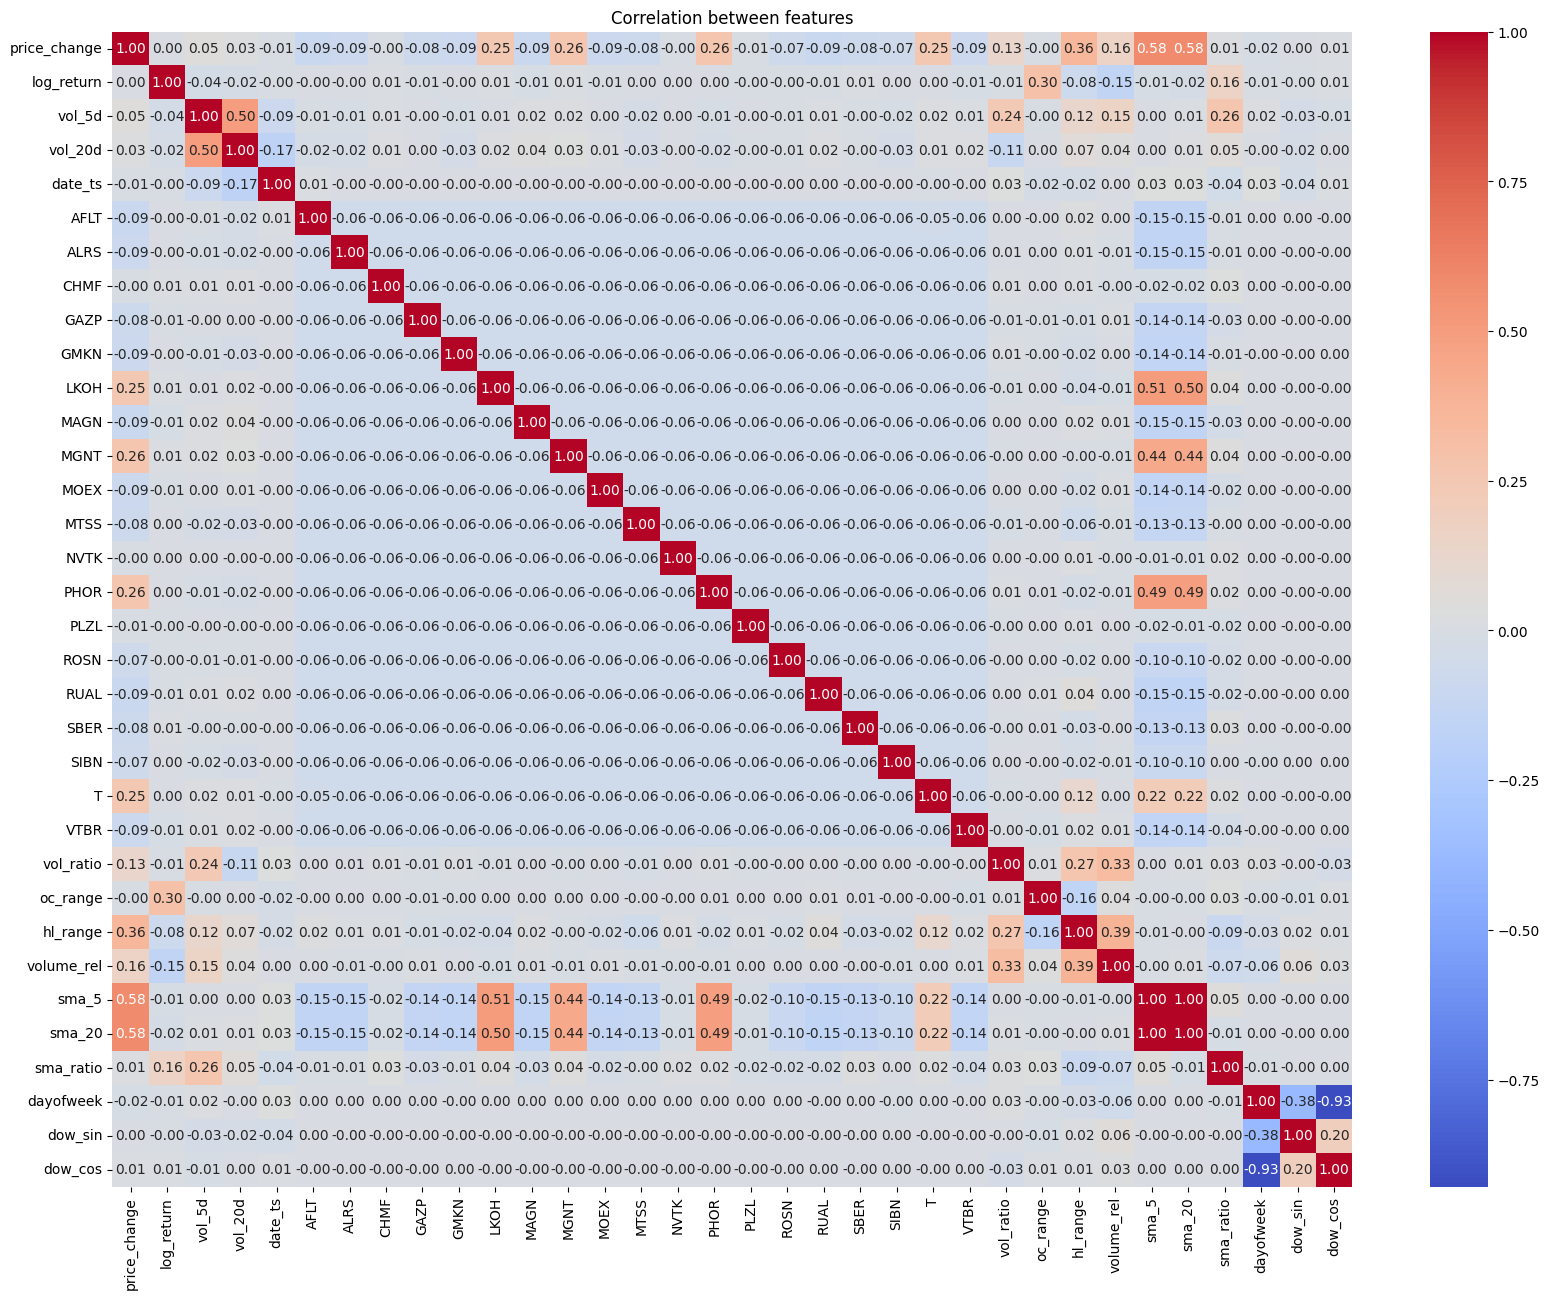

In [115]:
corr_matrix = data_out.corr()

plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between features")
plt.show()

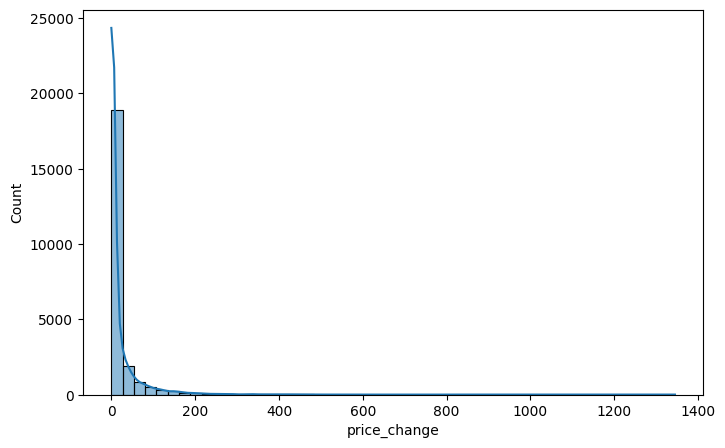

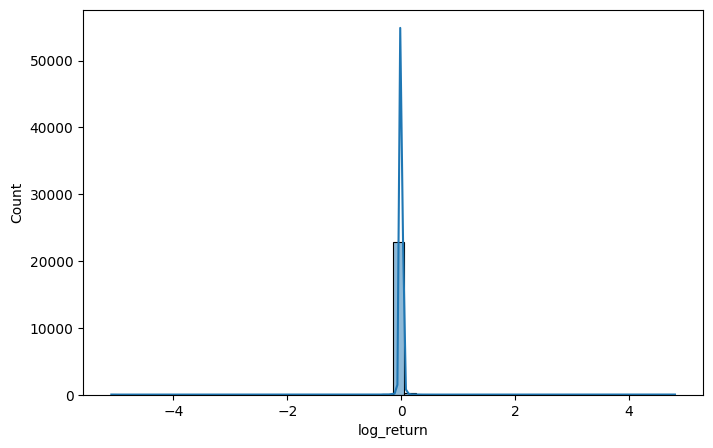

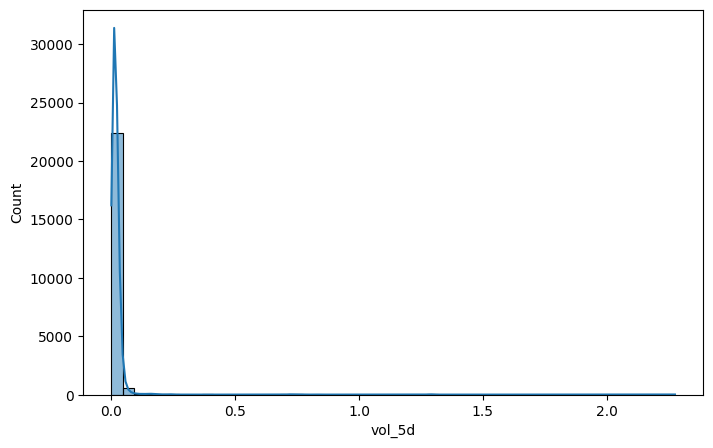

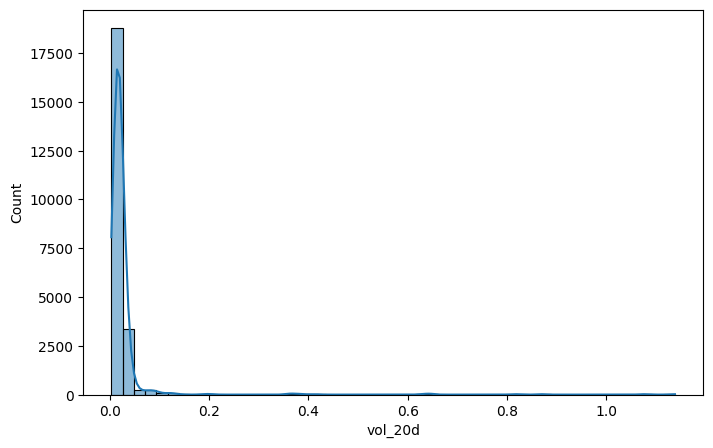

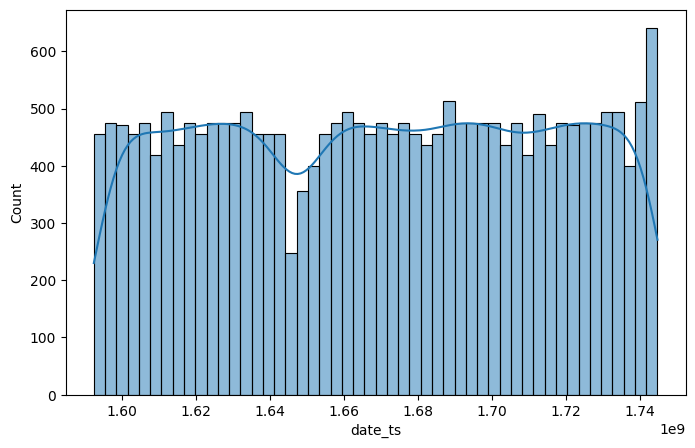

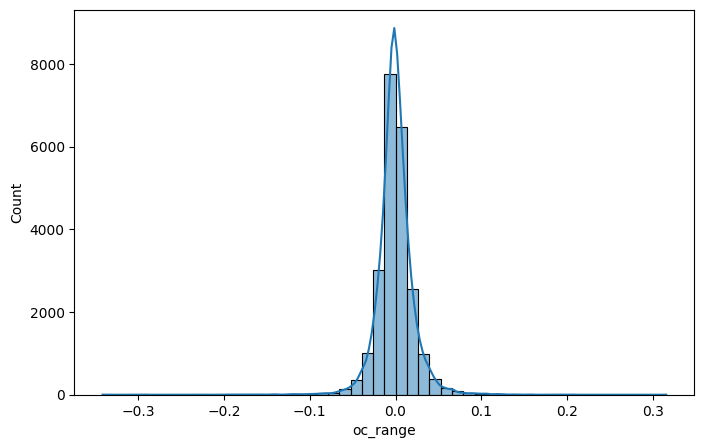

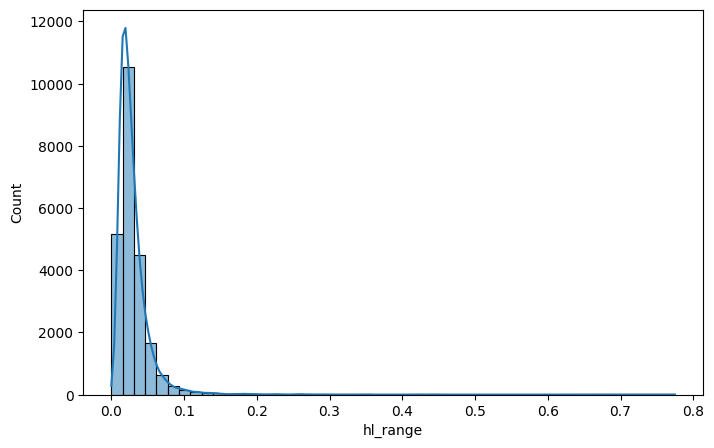

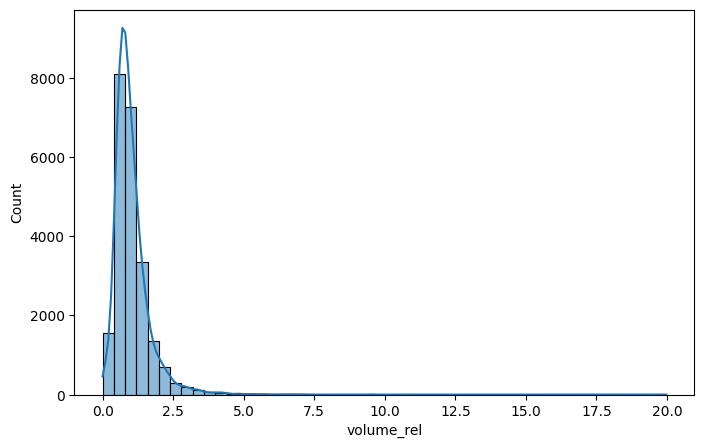

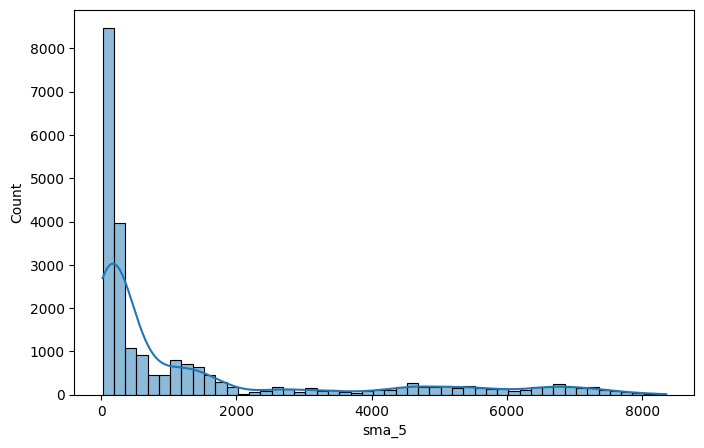

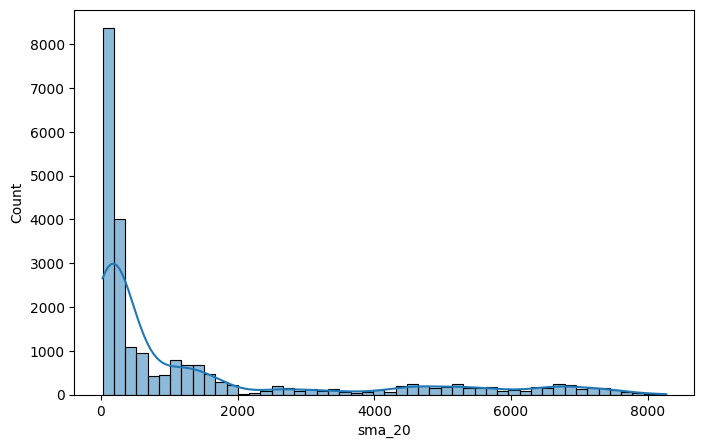

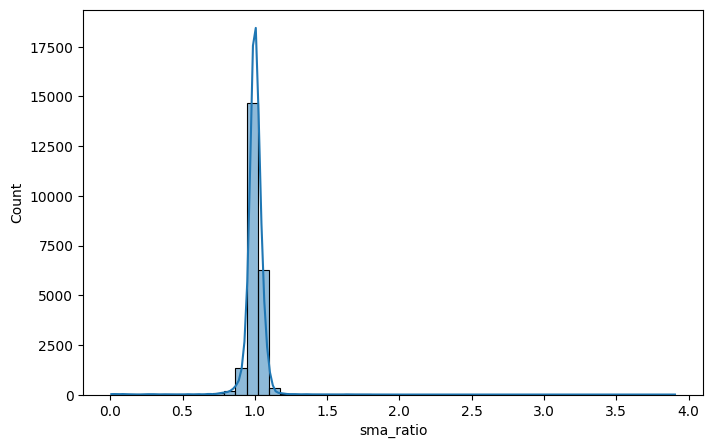

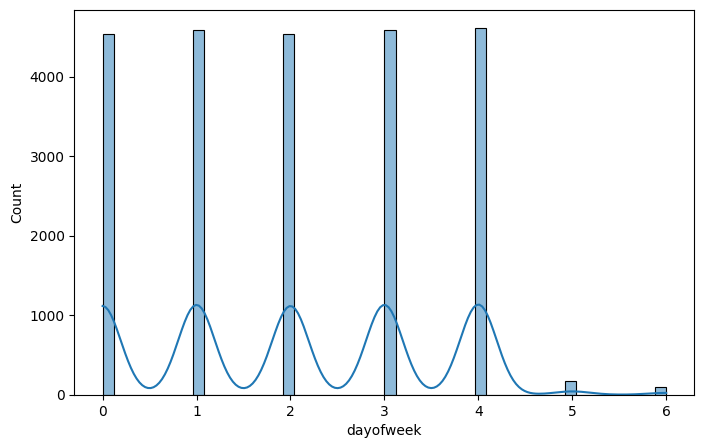

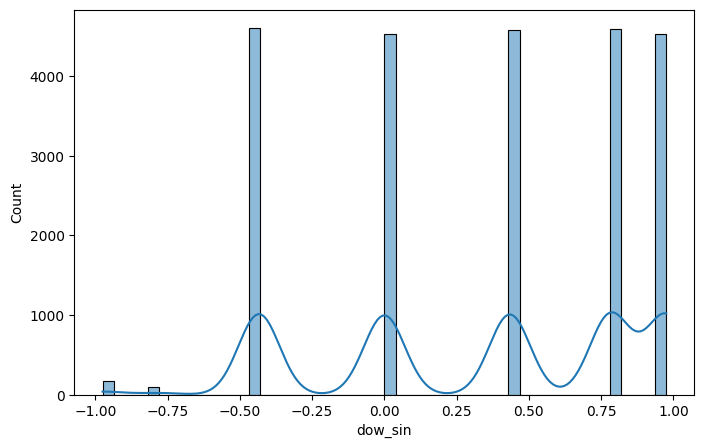

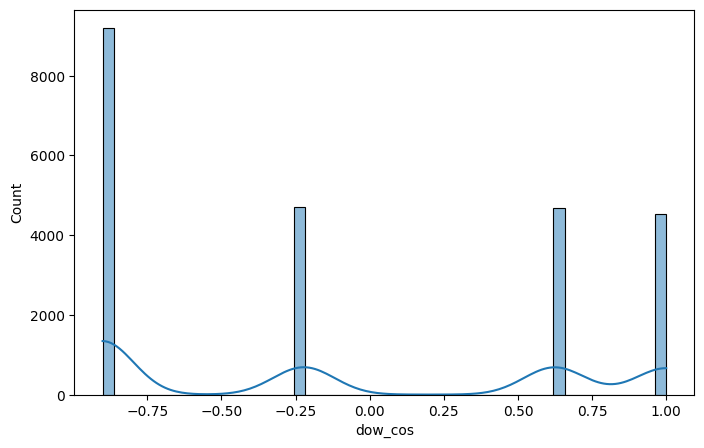

In [121]:
for i, item in enumerate(data_out.columns):
    if 5 <= i <= 24:
        pass
    else:
        plt.figure(figsize=(8,5))
        sns.histplot(df[item], bins=50, kde=True)
        plt.show()

In [123]:
data_out = data_out.join(targets)

data_out.to_csv('../src/data/raw/participants/new_train_candles.csv')

In [124]:
targets.head()


,target_return_1d,target_direction_1d,target_return_20d,target_direction_20d
0,0.004896,1,0.071726,1
1,-0.010962,0,0.048477,1
2,-0.007635,0,0.048522,1
3,-0.014892,0,0.096550,1
4,0.044344,1,0.104056,1
